In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [8]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [9]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


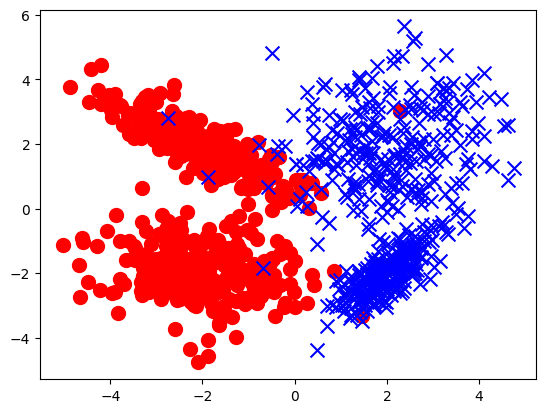

In [10]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

Accuracy = 1.00, F1-score = 1.00


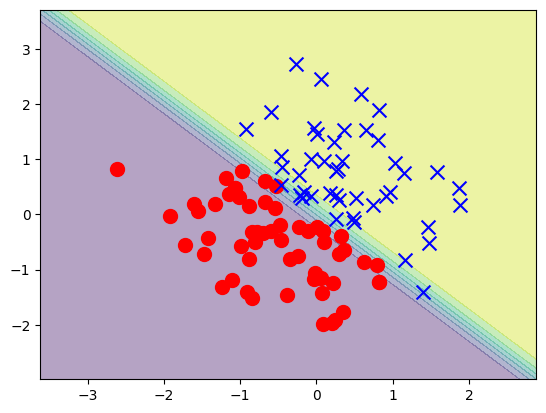

In [12]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        return self.predict_proba(X) > 0.5

if __name__ == "__main__":
    np.random.seed(42)
    X = np.random.randn(100, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)


    X = np.hstack([np.ones((X.shape[0], 1)), X])


    logreg = LogReg()
    logreg.fit(X, y)
    y_pred = logreg.predict(X)

    ac = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f'Accuracy = {ac:.2f}, F1-score = {f1:.2f}')


    xx, yy = np.meshgrid(
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01),
        np.arange(X[:, 2].min() - 1, X[:, 2].max() + 1, 0.01))

    XX = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = logreg.predict_proba(XX).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c='r', s=100)
    plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c='b', s=100)
    plt.show()

**Задание 1.**Выведите результаты работы библиотечной модели - в численном и в графическом виде.

Наша модель: Accuracy = 1.00, F1-score = 1.00
Sklearn модель: Accuracy = 0.99, F1-score = 0.99


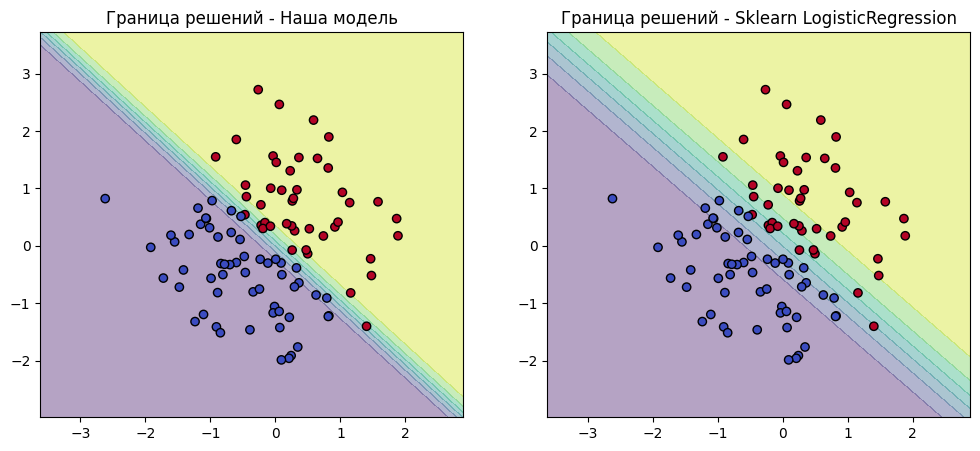

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        return 1. / n * X.T.dot(self.sigmoid(X, b) - y)

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        return self.predict_proba(X) > 0.5

if __name__ == "__main__":
    # Генерация случайных данных
    np.random.seed(42)
    X = np.random.randn(100, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Добавление смещения (единичный столбец)
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    # Обучение самописной модели
    logreg = LogReg()
    logreg.fit(X_bias, y)
    y_pred = logreg.predict(X_bias)

    # Обучение библиотечной модели
    sk_logreg = LogisticRegression()
    sk_logreg.fit(X, y)
    y_pred_sk = sk_logreg.predict(X)

    # Вычисление метрик
    ac_our = accuracy_score(y, y_pred)
    f1_our = f1_score(y, y_pred)

    ac_sk = accuracy_score(y, y_pred_sk)
    f1_sk = f1_score(y, y_pred_sk)

    print(f"Наша модель: Accuracy = {ac_our:.2f}, F1-score = {f1_our:.2f}")
    print(f"Sklearn модель: Accuracy = {ac_sk:.2f}, F1-score = {f1_sk:.2f}")

    # Границы решений
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

    # Прогноз нашей модели
    XX_bias = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z_our = logreg.predict_proba(XX_bias).reshape(xx.shape)

    # Прогноз sklearn модели
    XX = np.c_[xx.ravel(), yy.ravel()]
    Z_sk = sk_logreg.predict_proba(XX)[:, 1].reshape(xx.shape)

    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].contourf(xx, yy, Z_our, alpha=0.4)
    axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    axes[0].set_title("Граница решений - Наша модель")

    axes[1].contourf(xx, yy, Z_sk, alpha=0.4)
    axes[1].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    axes[1].set_title("Граница решений - Sklearn LogisticRegression")

    plt.show()


**Задание 2.**Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

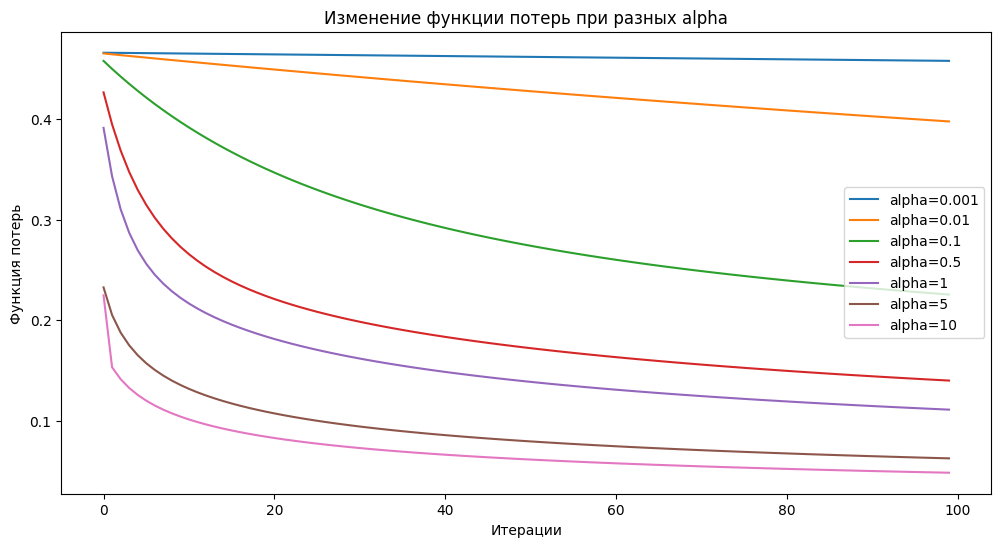

In [15]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.losses = []  # Список для хранения значений функции потерь

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
            loss = self.compute_loss(X, y, b)
            self.losses.append(loss)  # Сохраняем значение функции потерь
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

    def compute_loss(self, X, y, b):
        """Логистическая функция потерь (кроссэнтропия)"""
        pred = self.sigmoid(X, b)
        loss = -np.mean(y * np.log(pred + 1e-9) + (1 - y) * np.log(1 - pred + 1e-9))
        return loss

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        return 1. / n * X.T.dot(self.sigmoid(X, b) - y)

if __name__ == "__main__":
    # Генерация случайных данных
    np.random.seed(42)
    X = np.random.randn(100, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Добавление смещения
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    alphas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
    plt.figure(figsize=(12, 6))

    for alpha in alphas:
        logreg = LogReg(alpha=alpha, n_iters=100)
        logreg.fit(X_bias, y)
        plt.plot(logreg.losses, label=f"alpha={alpha}")

    plt.xlabel("Итерации")
    plt.ylabel("Функция потерь")
    plt.title("Изменение функции потерь при разных alpha")
    plt.legend()
    plt.show()

**Задание 3.**Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

Accuracy = 1.00, F1-score = 1.00


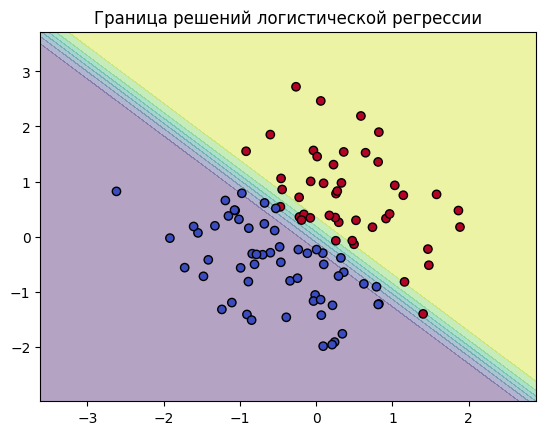

In [16]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = self._add_bias_column(X)  # Добавляем фиктивный столбец внутри метода
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        return 1. / n * X.T.dot(self.sigmoid(X, b) - y)

    def predict_proba(self, X):
        X = self._add_bias_column(X)  # Добавляем фиктивный столбец перед предсказанием
        return self.sigmoid(X, self.b)

    def predict(self, X):
        return self.predict_proba(X) > 0.5

    def _add_bias_column(self, X):
        """Добавляет фиктивный столбец единиц в X."""
        return np.hstack([np.ones((X.shape[0], 1)), X])

if __name__ == "__main__":
    # Генерация случайных данных
    np.random.seed(42)
    X = np.random.randn(100, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Обучение модели (X передаётся без изменений!)
    logreg = LogReg()
    logreg.fit(X, y)
    y_pred = logreg.predict(X)

    # Вычисление метрик
    ac = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f'Accuracy = {ac:.2f}, F1-score = {f1:.2f}')

    # Визуализация границы решений
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

    XX = np.c_[xx.ravel(), yy.ravel()]
    Z = logreg.predict_proba(XX).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Граница решений логистической регрессии")
    plt.show()

**Задание 4.** Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

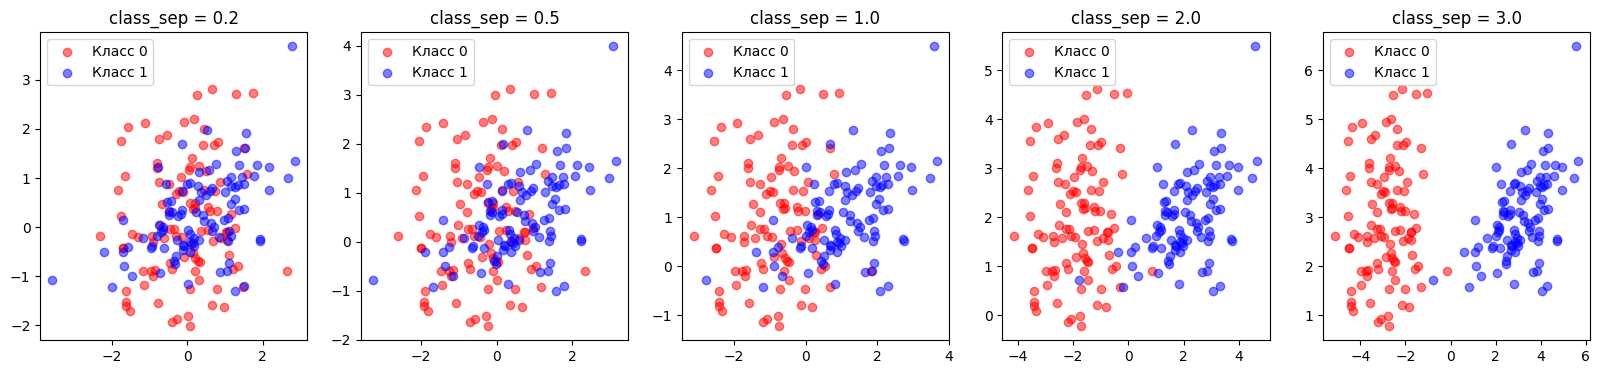

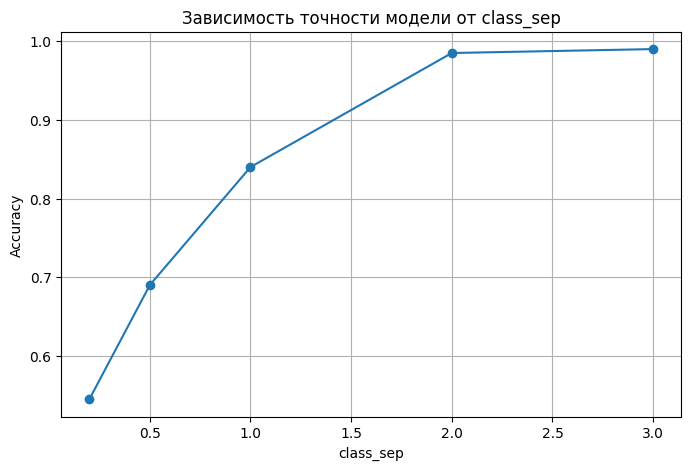

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Разные значения class_sep
class_sep_values = [0.2, 0.5, 1.0, 2.0, 3.0]
fig, axes = plt.subplots(1, len(class_sep_values), figsize=(20, 4))

accuracies = []

for i, class_sep in enumerate(class_sep_values):
    # Генерация данных с указанием корректных параметров
    X, y = make_classification(n_samples=200, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=2, n_clusters_per_class=1,
                               class_sep=class_sep, random_state=42)

    # Визуализация распределения
    axes[i].scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Класс 0', alpha=0.5)
    axes[i].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', label='Класс 1', alpha=0.5)
    axes[i].set_title(f'class_sep = {class_sep}')
    axes[i].legend()

    # Обучение модели
    model = LogisticRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Оценка точности
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)

plt.show()

# График зависимости точности от class_sep
plt.figure(figsize=(8, 5))
plt.plot(class_sep_values, accuracies, marker='o', linestyle='-')
plt.xlabel("class_sep")
plt.ylabel("Accuracy")
plt.title("Зависимость точности модели от class_sep")
plt.grid()
plt.show()


**Задание 5.** Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

# Генерация датасета с 50 признаками (из них 20 информативных)
X, y = make_classification(n_samples=1000, n_features=50,
                           n_informative=20, n_redundant=0, n_classes=2,
                           random_state=42)

# Наша модель логистической регрессии
class LogReg():
    def __init__(self, alpha=0.01, n_iters=5000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        return 1. / n * X.T.dot(self.sigmoid(X, b) - y)

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b):
        b = start_b.copy()
        for _ in range(self._n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = self._add_bias_column(X)
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b)

    def predict_proba(self, X):
        X = self._add_bias_column(X)
        return self.sigmoid(X, self.b)

    def predict(self, X):
        return self.predict_proba(X) > 0.5

    def _add_bias_column(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

# Обучение модели
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

# Оценка точности
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}')


Accuracy = 0.82, F1-score = 0.82


**Задание 6.** Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Генерация данных: 1000 объектов, 10 признаков, 5 классов
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=0,
                           n_classes=5, n_clusters_per_class=1,
                           random_state=42)

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Реализация "Один против всех" (OvR) вручную ---
class LogRegOvR:
    def __init__(self, alpha=0.01, n_iters=5000):
        self._alpha = alpha
        self._n_iters = n_iters
        self.classifiers = {}

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        return 1. / n * X.T.dot(self.sigmoid(X, b) - y)

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b):
        b = start_b.copy()
        for _ in range(self._n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = self._add_bias_column(X)
        unique_classes = np.unique(y)
        for c in unique_classes:
            binary_y = (y == c).astype(int)  # Перекодируем в бинарную задачу (OvR)
            start_b = np.zeros(X.shape[1])
            self.classifiers[c] = self.optimize(X, binary_y, start_b)

    def predict_proba(self, X):
        X = self._add_bias_column(X)
        probs = {c: self.sigmoid(X, b) for c, b in self.classifiers.items()}
        return np.column_stack([probs[c] for c in sorted(probs.keys())])

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def _add_bias_column(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

# Обучение нашей модели
logreg_ovr = LogRegOvR()
logreg_ovr.fit(X_train, y_train)
y_pred_ovr = logreg_ovr.predict(X_test)

# Оценка точности
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f'Наш LogReg OvR Accuracy: {accuracy_ovr:.2f}')

# --- 2. Реализация через sklearn с OneVsRestClassifier ---
sklearn_model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000))
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Оценка точности
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Sklearn LogReg OvR Accuracy: {accuracy_sklearn:.2f}')


Наш LogReg OvR Accuracy: 0.74
Sklearn LogReg OvR Accuracy: 0.75


**Задание 7.** Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Генерация данных: 1000 объектов, 10 признаков, 5 классов
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=0,
                           n_classes=5, n_clusters_per_class=1,
                           random_state=42)

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Реализация "Один против всех" (OvR) вручную ---
class LogRegOvR:
    def __init__(self, alpha=0.01, n_iters=5000):
        self._alpha = alpha
        self._n_iters = n_iters
        self.classifiers = {}

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        return 1. / n * X.T.dot(self.sigmoid(X, b) - y)

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b):
        b = start_b.copy()
        for _ in range(self._n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = self._add_bias_column(X)
        unique_classes = np.unique(y)
        for c in unique_classes:
            binary_y = (y == c).astype(int)  # Перекодируем в бинарную задачу (OvR)
            start_b = np.zeros(X.shape[1])
            self.classifiers[c] = self.optimize(X, binary_y, start_b)

    def predict_proba(self, X):
        X = self._add_bias_column(X)
        probs = {c: self.sigmoid(X, b) for c, b in self.classifiers.items()}
        return np.column_stack([probs[c] for c in sorted(probs.keys())])

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def _add_bias_column(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

# Обучение нашей модели
logreg_ovr = LogRegOvR()
logreg_ovr.fit(X_train, y_train)
y_pred_ovr = logreg_ovr.predict(X_test)

# Оценка точности
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f'Наш LogReg OvR Accuracy: {accuracy_ovr:.2f}')

# --- 2. Реализация через sklearn с OneVsRestClassifier ---
sklearn_model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000))
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Оценка точности
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Sklearn LogReg OvR Accuracy: {accuracy_sklearn:.2f}')

# --- 3. Вывод вероятностей для каждого объекта с помощью библиотеки sklearn ---
y_proba_sklearn = sklearn_model.predict_proba(X_test)

# Выводим вероятности для первых 5 объектов
print("\nВероятности для первых 5 объектов:")
for i in range(5):
    print(f"Объект {i+1}: {y_proba_sklearn[i]}")



Наш LogReg OvR Accuracy: 0.74
Sklearn LogReg OvR Accuracy: 0.75

Вероятности для первых 5 объектов:
Объект 1: [0.249635   0.19441629 0.14030158 0.03555675 0.38009038]
Объект 2: [0.40821754 0.27619339 0.08059157 0.13404749 0.10095002]
Объект 3: [0.00241552 0.01174348 0.25099228 0.00415317 0.73069555]
Объект 4: [0.14048598 0.00398514 0.04004661 0.79201778 0.02346448]
Объект 5: [0.00119223 0.00445405 0.41789461 0.00406953 0.57238957]
